In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
#wind switch is defined as the point where the two trajectories intersect--or maybe it's better to say it vice versa

#fireline is defined as the point on either manifold with the max s value


In [5]:
# defining stuff########

#parameters

l=0.02688; #heat transfer coefficient
vstar=.1 #initial fuel load

#reaction term

def react(u):
    if u <= 0: 
        return 0
    else:
        return np.exp(-1/u)
    
#wind term

def wind(x,alpha):
    if x<0:
        return alpha
    elif x>0:
        return beta
    elif x==0:
        return 0
    #piecewise function for the wind
    
#ODES governing front solution in first order form
def dUdt(U, t,cstar):
    u,s = U

    udot=s
    sdot=-cstar*s-(vstar*react(u)-l*u)
    
    return [udot,sdot]    


z_dom=250
z_steps=2*z_dom

z_span_backward = np.linspace(z_dom,-z_dom, z_steps)
z_span_forward=np.linspace(-z_dom, z_dom, z_steps)

#prescribe w values

alpha=-0.04
beta=-alpha
#pick a range of c vals to explore
num_vals=50

#if vstar==1:
   # c_vals=np.linspace(0.84-alpha,0.84+alpha,num_vals)

#elif vstar==0.1:
   # c_vals=np.linspace(0.085-alpha,0.085-alpha/4,num_vals)

c_hat=-0.08547147736773512
c_vals=np.linspace(c_hat+alpha, c_hat+beta,num_vals)
    

In [7]:
#####root finding######

#spacing algoritm to cluster around either end--cluster towards 0 if spacing >1 
def my_lin(lb, ub, steps, spacing=5):
    span = (ub-lb)
    dx = 1.0 / (steps-1)
    return [lb + (i*dx)**spacing*span for i in range(steps)]

lin = my_lin(0, 10, 11)

#finding fixed points#
    
umax=37  #upper bound based on largest zero of func(u) when v_val=1 
urange=my_lin(0,umax, 10)

#fixed points are given by roots of this function
def func(u):
      return vstar*react(u)-l*u

zero_init=0 #initial guess
all_zeros=[] #make sure list contains that initial guess-specific to this problem because I know 0 is always a zero
tol=13 #decimal place tolerance--could probably do something where I vary this 

#find all zeros--number of zeros will vary on number of entries in urange (fineness of search)
for x0 in urange:
    #print("guess was: "+str(x0))
    zero = sp.optimize.fsolve(func, x0) 
    #print("zero found: " +str(zero))
    zero_num=zero[0]
    all_zeros.append(zero_num)
    
#print("I found all of these zeros:  " + str(all_zeros))

distinct_zeros=[]

for i in range(len(all_zeros)-1): #-1 to prevent "out of range error"
    if (round(all_zeros[i],tol)!=round(all_zeros[i+1],tol) and round(all_zeros[i],tol) not in distinct_zeros) :
        distinct_zeros.append(all_zeros[i])
        
distinct_zeros.append(all_zeros[len(all_zeros)-1])
        
#print("The distinct zeros are: " + str(distinct_zeros))

if len(distinct_zeros) != 3:
    print("fix something!")
    
fp0=(distinct_zeros[0],0) #u,s
fp1=(distinct_zeros[1],0)
fp2=(distinct_zeros[2],0)
    

In [9]:

stable_wind_domain=np.linspace(0, z_dom, z_steps)
unstable_wind_domain=np.linspace(-z_dom,0, z_steps)

In [11]:
###MANIFOLD CALCULATIONS####

##stable manifolds!##



##stable manifolds!## 
##second evec##

u_list_s2=[]
s_list_s2=[]

#loop through c options
for c in c_vals:
    
    for val in stable_wind_domain:
            
        cstar_val=c-wind(val,beta)
        #print(val,wind(val,w1,w2))
    
    lamda_s=0.5*((cstar_val)-np.sqrt((cstar_val)**2+4*l))
    pert=.001;
    v1_us=-1;
    v2_us=(v1_us)*(lamda_s)
    
    #print(lamda_s)

    uzero_stable_direction=[fp2[0]+pert*v1_us,fp2[1]+pert*v2_us]
    stable_manifold = odeint(dUdt, uzero_stable_direction, z_span_backward,args=(cstar_val,))
    
    u=stable_manifold[:, 0]
    s=stable_manifold[:, 1]
    
    u_list_s2.append(u)
    s_list_s2.append(s)

print("Done with stable manifold!")


   
   

Done with stable manifold!


In [13]:
###UNSTABLE MANIFOLD####### 
#first evec

u_list_us1=[]
s_list_us1=[]

    
#loop through c options
for c in c_vals:
    
    for val in unstable_wind_domain:
        cstar_val=c-wind(val,alpha)
      
    lamda_us=0.5*((cstar_val)+np.sqrt((cstar_val)**2+4*l))
    pert=.001;
    v1_us=1;
    v2_us=(v1_us)*lamda_us
    #print(lamda_us)

    uzero_unstable_direction=[fp0[0]+pert*v1_us,fp0[1]+pert*v2_us]
    unstable_manifold = odeint(dUdt, uzero_unstable_direction, z_span_forward,args=(cstar_val,))
    
    u=unstable_manifold[:, 0]
    s=unstable_manifold[:, 1]
    
    u_list_us1.append(u)
    s_list_us1.append(s)

   
   # print("c=cstar_val_2+w2 is ", c)
    #print("cstar_val_2 is ", cstar_val_2)


print("Done with unstable manifold!")



Done with unstable manifold!


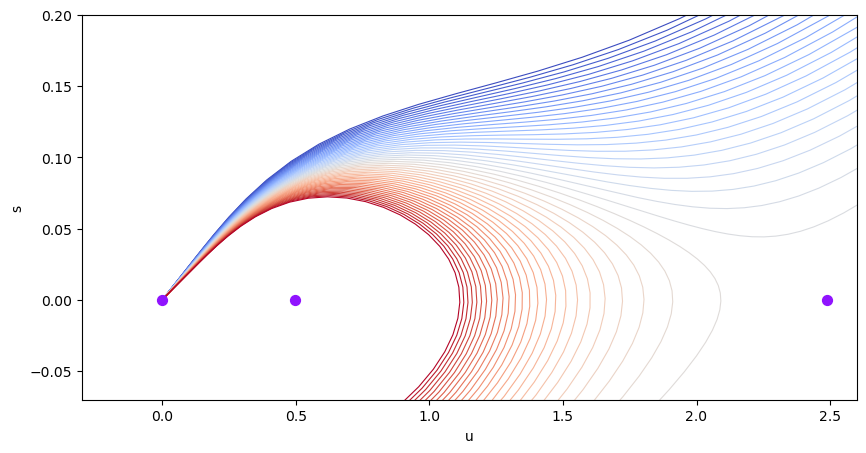

In [15]:
##plotting unstable manifold##


fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.set_xlabel('u')
ax2.set_ylabel('s')

colors=plt.cm.coolwarm(np.linspace(0,1,num_vals)) 

for item in range(len(c_vals)):
    
   
    #item=2
    #plt.plot(u_list_s2[item], s_list_s2[item],linewidth=0.8,color="gray")#label=(c_vals[item]));
    
    plt.plot(u_list_us1[item], s_list_us1[item],linewidth=0.8,color=colors[item]); 
    

    

    
   # plt.scatter(u_list_us1[item], s_list_us1[item],s=10,color=colors[item],label=(c_vals[item])); 
   # plt.scatter(u_list_s2[item], s_list_s2[item],s=10,color=colors[item]);

    

   # plot fixed points
plt.scatter(fp0[0],fp0[1],color="#9013FE", s=50, zorder=2)
plt.scatter(fp1[0],fp1[1],color="#9013FE", s=50, zorder=2)
plt.scatter(fp2[0],fp2[1],color="#9013FE", s=50, zorder=2)

#plt.title("unstable manifolds for various values of c for (vstar,alpha)= " + str((vstar, alpha)))
plt.xlim(-.3,2.6) 
plt.ylim(-.07,.2)     

#plt.legend()
#plt.legend(loc=(1.04, 0))
plt.savefig("type2_leftside.eps", format='eps',bbox_inches='tight')
plt.show()





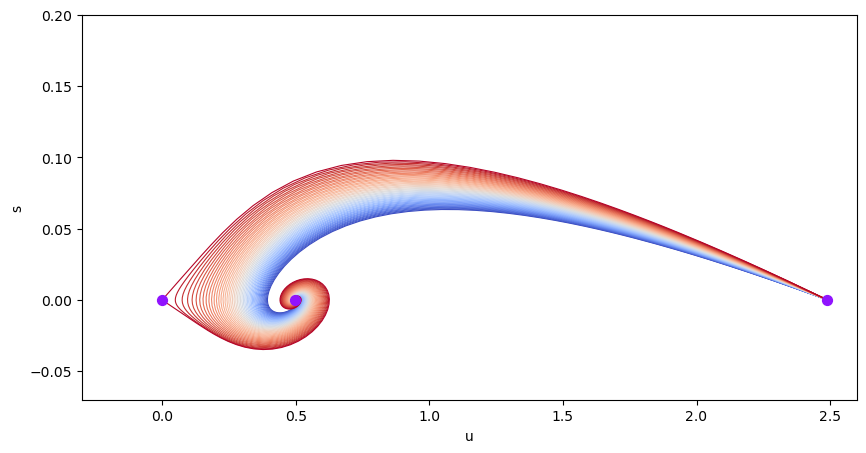

In [17]:
##plotting stable manifold##



fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.set_xlabel('u')
ax2.set_ylabel('s')

colors = plt.cm.coolwarm(np.linspace(0,1,num_vals))

for item in range(len(c_vals)):
    
   
   
    plt.plot(u_list_s2[item], s_list_s2[item],linewidth=0.8,color=colors[item])#label=(c_vals[item]));
    
   
    #plt.scatter(u_list_s2[item], s_list_s2[item],s=5,color=colors[item]);

    

   # plot fixed points
plt.scatter(fp0[0],fp0[1],color="#9013FE", s=50, zorder=2)
plt.scatter(fp1[0],fp1[1],color="#9013FE", s=50, zorder=2)
plt.scatter(fp2[0],fp2[1],color="#9013FE", s=50, zorder=2)

#plt.title("stable manifolds for various values of c for (vstar,alpha)= " + str((vstar, alpha)))
plt.xlim(-.3,2.6) 
plt.ylim(-.07,.2)     

#plt.legend()
#plt.legend(loc=(1.04, 0))
plt.savefig("type2_rightside.eps", format='eps',bbox_inches='tight')
plt.show()





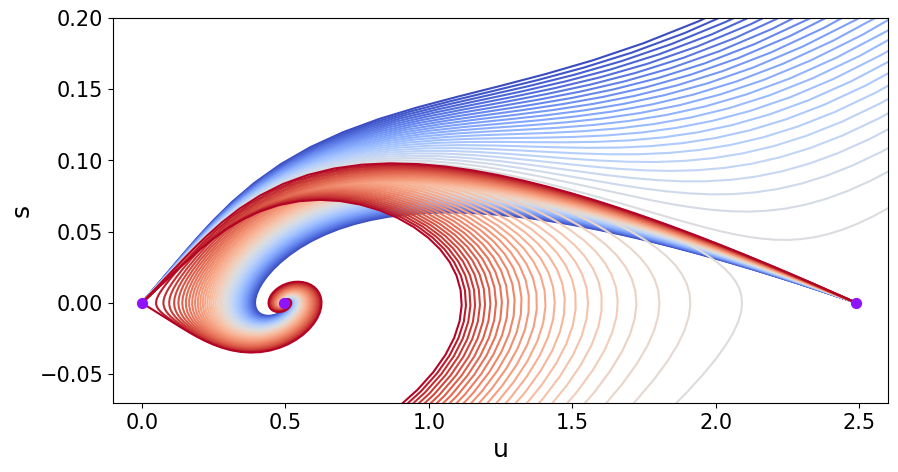

In [19]:
##plotting both manifolds for all c vals##




fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('u', fontsize=18)
ax.set_ylabel('s',fontsize=18)
ax.tick_params(axis="both", which="major", labelsize=15)

#colors = plt.cm.viridis(np.linspace(0,1,num_vals))
colors=plt.cm.coolwarm(np.linspace(0,1,num_vals)) 

for item in range(len(c_vals)):
    
   
    #item=4
   # plt.plot(u_list_s2[item], s_list_s2[item],linewidth=0.8,color="gray")#label=(c_vals[item]));
    
   # plt.plot(u_list_us1[item], s_list_us1[item],linewidth=0.8,color="gray"); 
    

    

    
    plt.plot(u_list_us1[item], s_list_us1[item],linewidth=1.5,color=colors[item],label=(c_vals[item])); 
    plt.plot(u_list_s2[item], s_list_s2[item],linewidth=1.5,color=colors[item]);

    

   # plot fixed points
plt.scatter(fp0[0],fp0[1],color="#9013FE", s=50, zorder=2)
plt.scatter(fp1[0],fp1[1],color="#9013FE", s=50, zorder=2)
plt.scatter(fp2[0],fp2[1],color="#9013FE", s=50, zorder=2)

#plt.title("Invariant Manifolds, (v,alpha)= " + str((vstar, alpha)))
plt.xlim(-.1,2.6) 
plt.ylim(-.07,.2)     
#plt.savefig("type2_phaseportrait.eps", format='eps',bbox_inches='tight')
#plt.legend()
#plt.legend(loc=(1.04, 0))
plt.show()





In [21]:
c_vals[30]

-0.07649188553100042

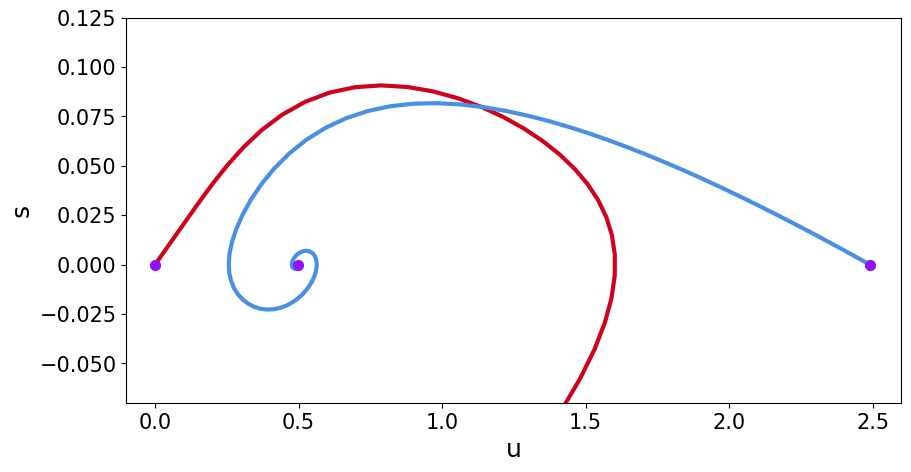

In [23]:
##plotting both manifolds for all c vals##



fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('u', fontsize=18)
ax.set_ylabel('s',fontsize=18)
ax.tick_params(axis="both", which="major", labelsize=15)

colors = plt.cm.viridis(np.linspace(0,1,num_vals))

#for item in range(len(c_vals)):
    
   
item=30
   # plt.plot(u_list_s2[item], s_list_s2[item],linewidth=0.8,color="gray")#label=(c_vals[item]));
    
   # plt.plot(u_list_us1[item], s_list_us1[item],linewidth=0.8,color="gray"); 
    

    

    

plt.plot(u_list_us1[item], s_list_us1[item],linewidth=3,color='#D0021B',label=(c_vals[item])); 
plt.plot(u_list_s2[item], s_list_s2[item],linewidth=3,color='#4A90E2');

    

   # plot fixed points
plt.scatter(fp0[0],fp0[1],color="#9013FE", s=50, zorder=2)
plt.scatter(fp1[0],fp1[1],color="#9013FE", s=50, zorder=2)
plt.scatter(fp2[0],fp2[1],color="#9013FE", s=50, zorder=2)
    

 

#plt.title("Invariant Manifolds, (v,alpha)= " + str((vstar, alpha)))
plt.xlim(-.1,2.6) 
plt.ylim(-.07,.125)     
plt.savefig("type2_individualtrajectory.eps", format='eps',bbox_inches='tight')
#plt.legend()
#plt.legend(loc=(1.04, 0))
plt.show()



